# part B

In [17]:
#imports
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


#Load data
ExpidiaHotels1 = pd.read_csv('expediaHotels1.csv')
ExpidiaHotels2 = pd.read_csv('expediaHotels2.csv')
ExpidiaHotels3 = pd.read_csv('expediaHotels3.csv')
ExpidiaHotels = ExpidiaHotels1.append(ExpidiaHotels2)
ExpidiaHotels = ExpidiaHotels.append(ExpidiaHotels3)

In [18]:
#clean the data

#Drop rows with null in the price
ExpidiaHotels = ExpidiaHotels.dropna(axis=0, subset=['Price'])


#Clean letters
ExpidiaHotels.replace({'Price': ['\n','\$',',','€'], 'Review': ['NaN',' reviews','\)',',','\(',' review'], 'Rate': ['NaN'], 'LengthOfStay' : [' nights',' night']}, 
                      {'Price':  '' , 'Review':       ''          ,          'Rate':     '' , 'LengthOfStay' :          ''         }
                      ,inplace=True,regex=True)


#clean the rate
ExpidiaHotels.drop(ExpidiaHotels[ExpidiaHotels['Rate'] == 'Uknown'].index, inplace = True)
ExpidiaHotels.drop(ExpidiaHotels[ExpidiaHotels['Review'] == 'Uknown'].index, inplace = True)


#Transform Grade to Oridinaly
ExpidiaHotels.replace({'Grade' : {'Review score' : 6,'Good' : 7, 'Very Good' : 8,'Very good' : 8, 'Excellent' : 9 ,'Wonderful' : 9, 'Exceptional': 10}},inplace=True)


#Split the Dates
ExpidiaHotels['Start_Date']=ExpidiaHotels['DateOfVacation'].str.slice(stop=10)
ExpidiaHotels['End_Date']=ExpidiaHotels['DateOfVacation'].str.slice(start=11)
ExpidiaHotels.drop(["DateOfVacation"], axis = 1, inplace=True)

ExpidiaHotels = ExpidiaHotels.reset_index()



In [20]:
#convert the data
ExpidiaHotels = ExpidiaHotels.astype({"Rate":"float","Price":"int","Review":"int","Grade":"int", 'LengthOfStay' : 'int'})

#convert euro to shekel
ExpidiaHotels['Price']= ExpidiaHotels['Price']*3.93 

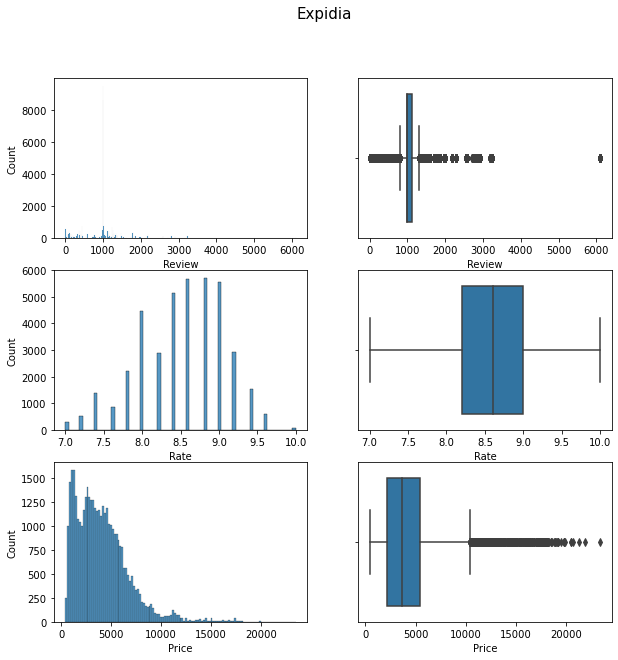

In [21]:
#Distribution graph

fig, axes = plt.subplots(3,2,figsize=(10, 10))

fig.suptitle("Expidia", fontsize=15)

sns.histplot(x=ExpidiaHotels['Review'], ax=axes[0,0])
sns.boxplot( x=ExpidiaHotels["Review"],ax=axes[0,1])
sns.histplot(x=ExpidiaHotels['Rate'], ax=axes[1,0])
sns.boxplot( x=ExpidiaHotels["Rate"],ax=axes[1,1])
sns.histplot(x=ExpidiaHotels['Price'], ax=axes[2,0])
sns.boxplot( x=ExpidiaHotels["Price"],ax=axes[2,1])
plt.show()

In [22]:
# remove outliers

#Expidia
arr = ['Price']

for col in arr:
    Q1 = np.percentile(ExpidiaHotels[col] , 25)
    Q3 = np.percentile(ExpidiaHotels[col] , 75)

    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    ExpidiaHotels[col] = ExpidiaHotels[col][(ExpidiaHotels[col] < ul) &
                                                (ExpidiaHotels[col] > ll)]
    
    #dropna
    ExpidiaHotels = ExpidiaHotels[ExpidiaHotels['Price'].notna()]

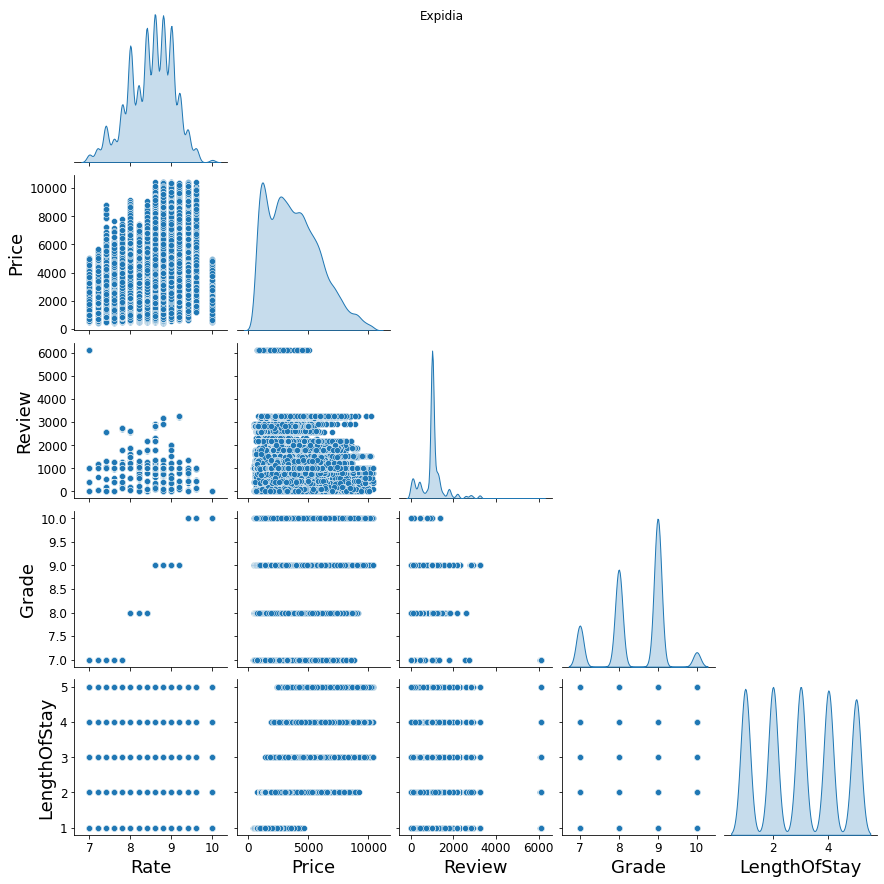

In [23]:
#pairgrid relationship

with sns.plotting_context(rc={"axes.labelsize":18, 'font.size': 12}):
   g = sns.pairplot(ExpidiaHotels[['Rate','Price','Review','Grade','LengthOfStay']], kind='scatter', diag_kind='kde',corner=True)
g.fig.suptitle("Expidia")
plt.show()

**insights**:<br />
1.We can see that a hotel with a small amount of reviews tends to be more extreme in the rate.<br />
2.we see the big corrlelation between rate and grade, they behave in the same way.<br />
3.there is a big correlation between number of nights and the price.<br />

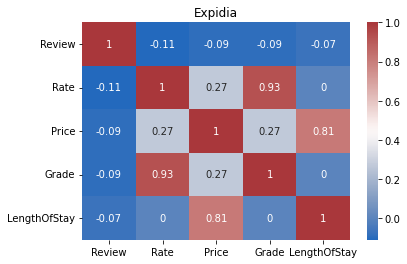

In [24]:
#Correlation

#Expidia
cor_data = ExpidiaHotels[['Review','Rate','Price','Grade','LengthOfStay']]
matrix = cor_data.corr().round(2)
sns.heatmap(matrix, cmap='vlag',annot=True)
plt.title('Expidia')
plt.show()

In [25]:
#create the csv file

ExpidiaHotels.to_csv('expidiaHotelsClean.csv', index=False)